In [2]:
import pvl
from planet4 import io

In [4]:
labelfile = "/Users/klay6683/Dropbox/data/hirise/RDRCUMINDEX.LBL"

In [6]:
lbl = pvl.load(labelfile)

In [21]:
lblcols = [k for k in lbl['RDR_INDEX_TABLE'] if k[0] == 'COLUMN']

In [28]:
cols = [col[1]['NAME'] for col in lblcols]

In [29]:
len(cols)

54

In [39]:
df = pd.read_csv("/Users/klay6683/Dropbox/data/hirise/RDRCUMINDEX.TAB", names=cols)

In [33]:
[col for col in cols if 'LATITUDE' in col]

['SUB_SOLAR_LATITUDE',
 'SUB_SPACECRAFT_LATITUDE',
 'MINIMUM_LATITUDE',
 'MAXIMUM_LATITUDE',
 'PROJECTION_CENTER_LATITUDE',
 'CORNER1_LATITUDE',
 'CORNER2_LATITUDE',
 'CORNER3_LATITUDE',
 'CORNER4_LATITUDE']

In [42]:
df['median_lat'] = df.filter(regex="CORNER._LATITUDE").median(axis=1)

In [43]:
df['median_lon'] = df.filter(regex='CORNER._LONGITUDE').median(axis=1)

In [47]:
df.median_lon.dtype

dtype('float64')

In [48]:
to_plot = df.loc[df.median_lat < -70]

In [49]:
to_plot.shape

(6394, 56)

In [51]:
to_plot.SOLAR_LONGITUDE.describe()

count    6394.000000
mean      268.098379
std        58.155847
min         0.083000
25%       223.653000
50%       277.064000
75%       315.264000
max       359.358000
Name: SOLAR_LONGITUDE, dtype: float64

In [10]:
%matplotlib inline

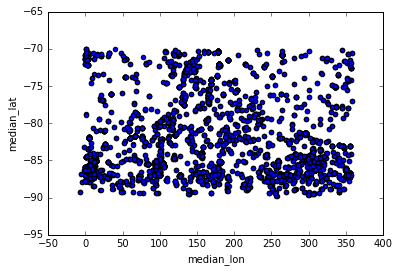

In [54]:
to_plot.plot(kind='scatter', x='median_lon', y='median_lat')

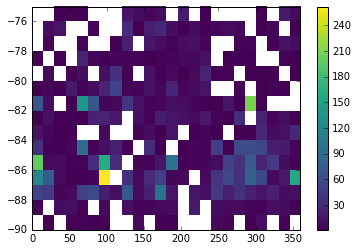

In [72]:
plt.hist2d(df.median_lon, df.median_lat, 
           bins=(range(0, 361, 15), range(-90, -74, 1)),
           cmap='viridis', cmin=1)
plt.colorbar()